In [3]:
# data: https://www.kaggle.com/arslanali4343/top-personality-dataset
import datapane as dp
import numpy as np
import pandas as pd

dp.__version__

'0.9.0'

In [9]:
df = pd.read_csv('./data/2018-personality-data.csv')
df.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [16]:
simple_table = pd.pivot_table(df, values='userid', index=' assigned metric', aggfunc='count')
simple_table

,userid
assigned metric,
all,208
diversity,520
popularity,574
serendipity,532


In [21]:
column_table = pd.pivot_table(df, values='userid', index=' assigned metric', columns=' assigned condition', aggfunc='count', margins=True)
column_table

assigned condition,default,high,low,medium,All
assigned metric,,,,,
all,208.0,NaN,NaN,NaN,208
diversity,NaN,176.0,170.0,174.0,520
popularity,NaN,178.0,204.0,192.0,574
serendipity,NaN,200.0,160.0,172.0,532
All,208.0,554.0,534.0,538.0,1834


In [24]:
multi_row_table = pd.pivot_table(df, values='userid', index=[' assigned metric', ' is_personalized'], columns=' assigned condition', aggfunc='count', margins=True)
multi_row_table

assigned condition                 default   high    low   medium   All
 assigned metric  is_personalized                                       
 all             1                      7.0    NaN    NaN      NaN     7
                 2                     39.0    NaN    NaN      NaN    39
                 3                     66.0    NaN    NaN      NaN    66
                 4                     77.0    NaN    NaN      NaN    77
                 5                     19.0    NaN    NaN      NaN    19
 diversity       1                      NaN   18.0   11.0     10.0    39
                 2                      NaN   45.0   40.0     38.0   123
                 3                      NaN   47.0   46.0     44.0   137
                 4                      NaN   57.0   68.0     75.0   200
                 5                      NaN    9.0    5.0      7.0    21
 popularity      1                      NaN   20.0   22.0     17.0    59
                 2                      NaN   45.0   59.0     41.0   145
                 3                      NaN   36.0   56.0     63.0   155
                 4                      NaN   64.0   58.0     61.0   183
                 5                      NaN   13.0    9.0     10.0    32
 serendipity     1                      NaN   21.0   14.0     24.0    59
                 2                      NaN   41.0   29.0     42.0   112
                 3                      NaN   59.0   42.0     47.0   148
                 4                      NaN   69.0   57.0     53.0   179
                 5                      NaN   10.0   18.0      6.0    34
All                                   208.0  554.0  534.0    538.0  1834

In [35]:
agg_table = pd.pivot_table(df, index=[' assigned metric', ' is_personalized'], columns=[' enjoy_watching '], aggfunc={'userid': 'count', ' predicted_rating_1': 'mean'})
agg_table

predicted_rating_1                      \
 enjoy_watching                                     1         2         3   
 assigned metric  is_personalized                                           
 all             1                           4.545507  4.418390  4.643596   
                 2                           4.776938  4.734157  4.595524   
                 3                                NaN  4.275522  4.509504   
                 4                                NaN  4.798011  4.331157   
                 5                                NaN  4.372483       NaN   
 diversity       1                           4.327316  4.341419  4.430719   
                 2                           4.305766  4.469270  4.408019   
                 3                           4.397400  4.377145  4.450665   
                 4                                NaN  3.995915  4.304563   
                 5                                NaN       NaN  4.420742   
 popularity      1                           4.114084  4.106808  4.381441   
                 2                           4.051805  4.157526  4.225527   
                 3                                NaN  4.296580  4.215004   
                 4                           3.788745  4.148196  4.243816   
                 5                                NaN       NaN  4.411449   
 serendipity     1                           4.238758  4.278902  4.119573   
                 2                           4.231630  4.301787  4.271400   
                 3                           4.048548  4.444929  4.197958   
                 4                                NaN  4.543898  4.329006   
                 5                                NaN       NaN       NaN   

                                                      userid              \
 enjoy_watching                           4         5      1     2     3   
 assigned metric  is_personalized                                          
 all             1                      NaN  4.550899    3.0   1.0   2.0   
                 2                 4.748384  4.661752    2.0  19.0  11.0   
                 3                 4.552572  4.793864    NaN  16.0  11.0   
                 4                 4.542467  4.680759    NaN   5.0   7.0   
                 5                 4.645279  4.639225    NaN   1.0   NaN   
 diversity       1                 4.611402  4.702050    5.0  16.0  11.0   
                 2                 4.306073  4.499891    4.0  49.0  38.0   
                 3                 4.386735  4.433434    1.0  16.0  42.0   
                 4                 4.430980  4.458892    NaN   2.0  21.0   
                 5                 4.486879  4.507939    NaN   NaN   2.0   
 popularity      1                 4.481254  4.947660   21.0  24.0   7.0   
                 2                 4.288342  4.606872    6.0  45.0  58.0   
                 3                 4.345993  4.472408    NaN  17.0  57.0   
                 4                 4.341330  4.284165    1.0   2.0  16.0   
                 5                 4.367487  4.346336    NaN   NaN   3.0   
 serendipity     1                 4.174492  4.644035   18.0  23.0  10.0   
                 2                 4.332248  4.136013    2.0  48.0  33.0   
                 3                 4.330770  4.369427    2.0  14.0  40.0   
                 4                 4.320665  4.424457    NaN   1.0  27.0   
                 5                 4.261457  4.446381    NaN   NaN   NaN   

                                                
 enjoy_watching                        4     5  
 assigned metric  is_personalized               
 all             1                   NaN   1.0  
                 2                   5.0   2.0  
                 3                  33.0   6.0  
                 4                  47.0  18.0  
                 5                   3.0  15.0  
 diversity       1                   3.0   4.0  
                 2                  28.0   4.0  
                 3      

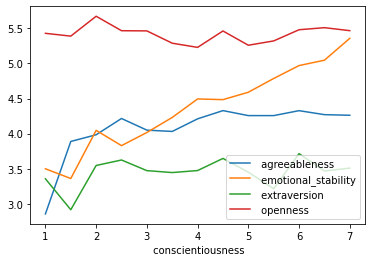

In [36]:
plot_table = pd.pivot_table(df, index=' conscientiousness', values=[' agreeableness', ' emotional_stability', ' extraversion', ' openness'], aggfunc='mean').plot()

In [39]:
md = '''
# Pivot Tables in Excel vs Python
{{Image1}}
Photo by [Mika Baumeister](https://unsplash.com/@mbaumi?utm_source=medium&utm_medium=referral) on [Unsplash](https://unsplash.com/?utm_source=medium&utm_medium=referral)

Pivot Tables are probably one of the most important tools in Data Science and Business Intelligence. Pivot Tables are traditionally done in Excel, but if you are a Python enthusiast like me, why not do it in Python?

# What are Pivot Tables?
First, what questions can we answer with Pivot Tables? Here are some examples of them:
* How many sales are made in each region?
* What is the summary of the trend of house prices for the past 10 years?
* How many people are living in each city?
Pivot Tables allow you to summarise large and complex datasets to allow for better understanding. Pivot Tables consist of row labels, column labels and values. Both row and column can have multi labels, which can be described as multi-level pivot tables. The values can be aggregated by different functions such as sum, average or percentage. A very concise and complete introduction to pivot tables can be found here.

I will be using the [MBTI Top Personality Dataset](https://www.kaggle.com/arslanali4343/top-personality-dataset) by Arslan Ali. The description and explanation of the dataset can be found in this [paper](https://link.springer.com/article/10.1007/s10796-017-9782-y). The dataset describes and compares the personalities of different individuals. The dataset contains 1820 rows and 34 columns. I am going to summarise the dataset into a more readable form.

I will be using Datapane to display the dataset:
{{Table1}}

## Pivot Tables with Excel
Let's start with using Excel.

We will start with a very simple pivot table. Let's say we want to see the count of users for each assigned metric. Creating this is as simple as dragging the fields (top right) to the relevant labels (bottom right).

{{Image2}}

Let's add the assigned condition as a column label. We can now understand that of the assigned metric, what are the counts of each assigned condition.

{{Image3}}

We can build even more complex pivot tables by adding labels. The table below shows that you can even use fields with values as row labels.

{{Image4}}

## Pivot Tables with Pandas
[Pandas](https://pandas.pydata.org/) is an open-source Python library used for data analysis. It can read spreadsheets easily using `pd.read_csv()` or `pd.read_excel()`.

Pandas allow easy creation of pivot tables using the function `pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)`.

* The `data` the parameter is the selected DataFrame where the pivot table is based on.
* `values`, `columns` correspond to the values and columns section in Excel.
* `index` correspond to the rows section in Excel.
* `fill_value` and `dropna` allow missing data to be filled by a specified value or rows to be removed.
* `aggfunc` describes the aggregation function used on the values. Several common choices include `'count'`, `'mean'`, `'max'`, `'min'`. We will first explore `'count'`, replicating the example above.

Let's do everything we did on Excel with Pandas. You can see that creating a pivot table is as easy as one line of code.

```python
simple_table = pd.pivot_table(df, values='userid', index=' assigned metric', aggfunc='count')
```

{{Table2}}

By setting `margins=True`, the subtotal and grand totals are included at the end of the columns and rows.

```python
column_table = pd.pivot_table(df, values='userid', index=' assigned metric', columns=' assigned condition', aggfunc='count', margins=True)
```

{{Table3}}

Want to add more fields into row and column labels? No problem! Just add a list to the parameters!

```python
multi_row_table = pd.pivot_table(df, values='userid', index=[' assigned metric', ' is_personalized'], columns=' assigned condition', aggfunc='count', margins=True)
```

{{Table4}}

What if you want a different aggregation function for each column label? For instance, this would allow you to have counts for the user id and an average for the predicted movie rating. To solve this, Pandas provides a method, aggfunc that accepts a dictionary with keys as columns and values as aggregation functions.

```python
agg_table = pd.pivot_table(df, index=[' assigned metric', ' is_personalized'], columns=[' enjoy_watching '], aggfunc={'userid': 'count', ' predicted_rating_1': 'mean'})
```

Note that `values` is not required if a dictionary is initialised in `aggfunc`.

{{Table5}}

Suppose we want to see the correlation between conscientiousness and other metrics, we can easily plot the pivot table using `plot()`.

{{Plot1}}

## Conclusion
In the examples above, we can see that Pivot Tables give us a good summary and insight into the novel datasets. Pivot Tables in Python allow better customizability than Excel. With only one line of code, you can build many types of pivot table. It allows better automation such as pulling data directly from the source, better flexibility such as building custom aggregation function with tools like `groupby()`. Pandas also uses NumPy arrays as a base, allowing it to have as many rows and columns as you can fit in your memory. p.s. [Maximum size of Excel](https://support.microsoft.com/en-us/office/excel-specifications-and-limits-1672b34d-7043-467e-8e27-269d656771c3) is 1,048,576 rows by 16,384 columns.

However, Excel still exceeds Python in many other functions, almost every company uses it. There are much more functionalities in both Python and Excel, the choice should depend on the use cases of the user.

If you would like to have a chat with me, connect me on [LinkedIn](https://www.linkedin.com/in/eugene-teoh/)!

'''

report = dp.Report(
    dp.Text(md).format(
        Image1=dp.File(file='./images/cover.jpeg', id='Image1'),
        Table1=dp.DataTable(df, id='Table1'),
        Image2=dp.File(file='./images/pivot1.png', id='Image2'),
        Image3=dp.File(file='./images/pivot2.png', id='Image3'),
        Image4=dp.File(file='./images/pivot3.png', id='Image4'),
        Table2=dp.Table(simple_table, id='Table2'),
        Table3=dp.Table(column_table, id='Table3'),
        Table4=dp.Table(multi_row_table, id='Table4'),
        Table5=dp.Table(agg_table, id='Table5'),
        Plot1=dp.Plot(plot_table, id='Plot1')
    )
)
# report.preview()

In [42]:
report.publish(name='Pivot Tables in Excel vs. Python')

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/eugene/reports/pivot-tables-in-excel-vs-python/
